In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Import Mask RCNN
from mrcnn import visualize
import mrcnn.model as modellib

from samples.brixilated_lego import lego
tf.__version__

2021-10-23 23:41:37.966250: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


'2.5.0'

In [2]:
ROOT_DIR = './'
os.chdir(ROOT_DIR)

In [3]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [4]:
class InferenceConfig(lego.LegoConfig().__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()

In [5]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
LEGO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "snapshots", "weights","mask_rcnn_lego_0111.h5") # Comment out to use snapshot from latest training

model = modellib.MaskRCNN(mode="inference", model_dir="", config=config)
print("Loading weights ", LEGO_WEIGHTS_PATH)
model.load_weights(LEGO_WEIGHTS_PATH, by_name=True)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Instructions for updating:
Use fn_output_signature instead


2021-10-23 23:41:45.071364: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-10-23 23:41:45.129815: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:41:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-10-23 23:41:45.129856: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-10-23 23:41:45.133696: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-10-23 23:41:45.133751: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2021-10-23 23:41:45.134673: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.

Loading weights  ./snapshots/weights/mask_rcnn_lego_0111.h5


2021-10-23 23:41:46.231004: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-23 23:41:46.232830: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:41:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-10-23 23:41:46.233892: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2021-10-23 23:41:46.233942: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-10-23 23:41:46.622902: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect Stream

In [8]:
IMG_DIR = os.path.join(ROOT_DIR, 'datasets', 'real_images')
for image in os.listdir(IMG_DIR):
    print(image)

imgs


In [72]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator()
images = img_gen.flow_from_directory(IMG_DIR, target_size=(3297, 1908), class_mode=None, batch_size=1, shuffle=False)

Found 5 images belonging to 1 classes.


In [73]:
num_images = len(os.listdir(os.path.join(IMG_DIR, 'imgs')))
print(num_images)

5


In [74]:
DATASET = "val"
LEGO_DIR = os.path.join(ROOT_DIR, "datasets", "output", "coco_data")

dataset = lego.LegoDataset()
dataset.load_coco(LEGO_DIR, DATASET)
dataset.prepare()
print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

loading annotations into memory...
Done (t=5.60s)
creating index...
index created!
Images: 3029
Classes: ['BG', '2431', '3003', '3005', '3010', '3020', '3021', '3022', '3023', '3024', '3069', '3070', '3176', '3622', '3700', '3710', '3958', '4150', '4274', '6141', '11211', '11476', '11477', '15068', '15573', '22885', '24201', '24246', '25269', '29119', '29120', '33909', '35480', '36840', '47458', '47905', '85984', '87079', '87087', '87580', '93273', '98138', '99206']


(1, 3297, 1908, 3)


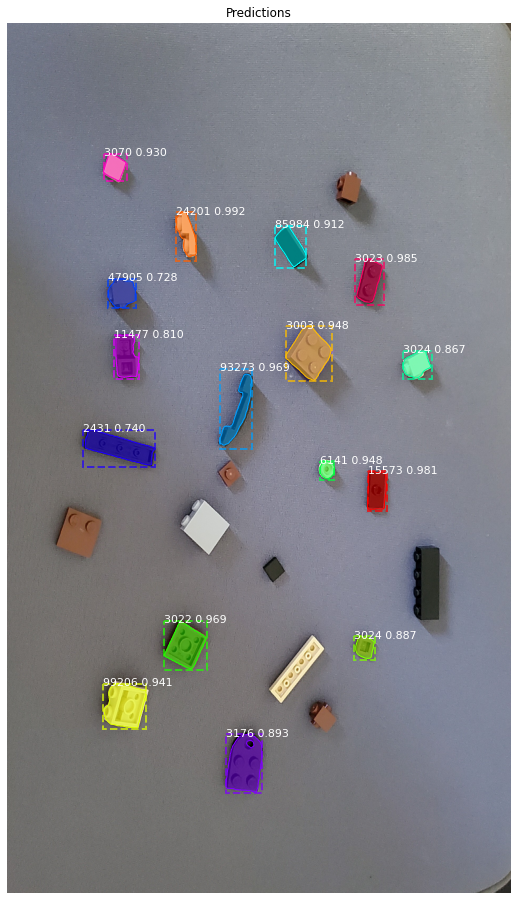

(1, 3297, 1908, 3)


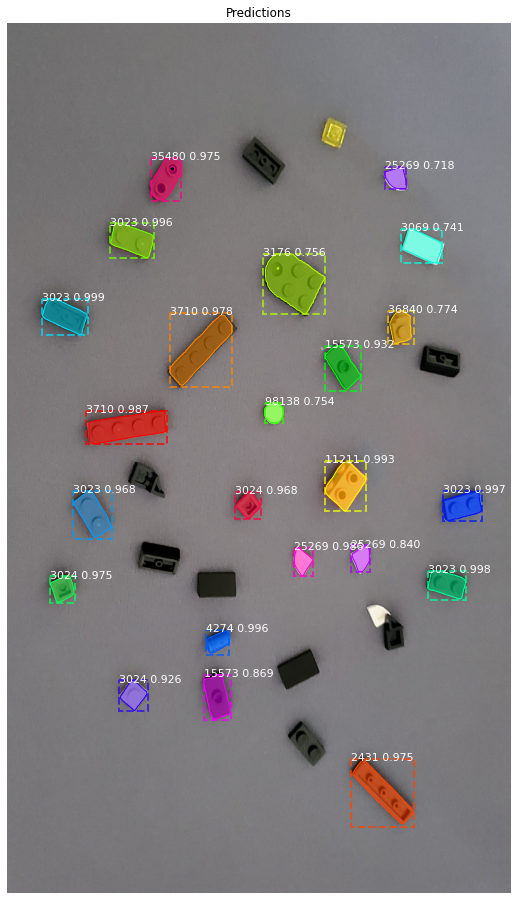

(1, 3297, 1908, 3)


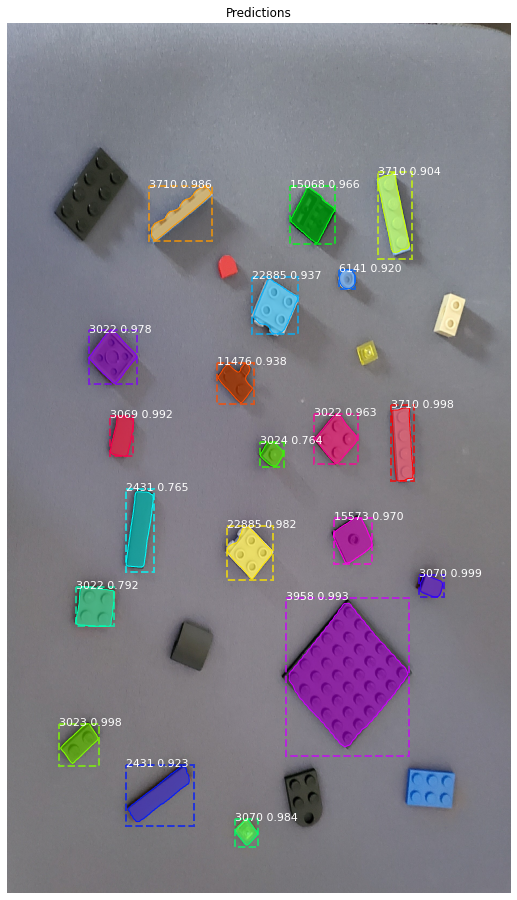

(1, 3297, 1908, 3)


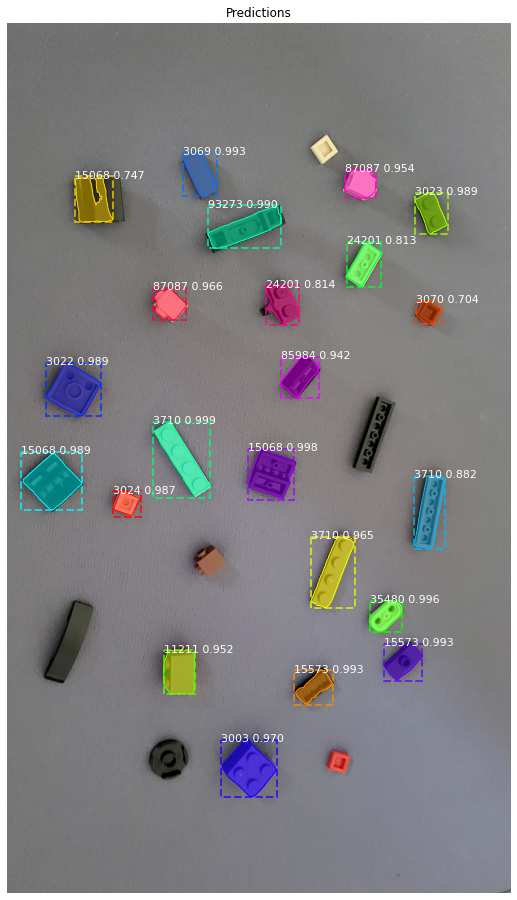

(1, 3297, 1908, 3)


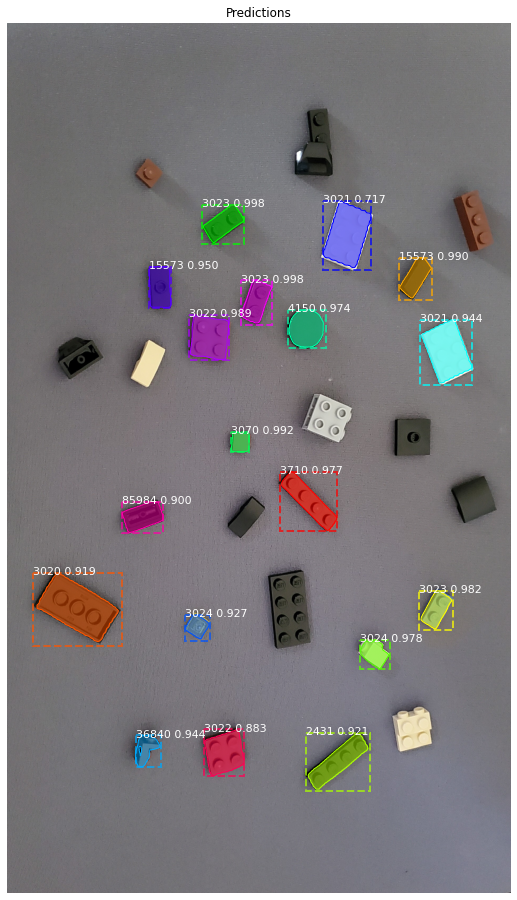

In [78]:
# # load random image from dataset
# image_id = np.random.choice(dataset.image_ids, 1)[0]
# image = dataset.load_image(image_id)

for img_idx, batch in enumerate(images):
    
    if img_idx >= num_images:
        break
        
    print(np.shape(batch))
    results = model.detect(batch, verbose=0)
    r = results[0]

    ax = get_ax(1)
    visualize.display_instances(batch[0], r['rois'], r['masks'], r['class_ids'], dataset.class_names, r['scores'], ax=ax, title="Predictions")
    plt.axis('image')
    plt.savefig(f'output_{img_idx}.png', bbox_inches='tight')
    plt.show()